In [1]:
import sys
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm

sys.path.append('../src/')
from pipeline import SearchEngine
from relevance import run_relevance_tests

/home/zim/.virtualenvs/SI650/lib/python3.11/site-packages/torch/cuda/__init__.py:611: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/home/zim/.virtualenvs/SI650/lib/python3.11/site-packages/torch/cuda/__init__.py:740: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() if nvml_count < 0 else nvml_count
/home/zim/.virtualenvs/SI650/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
search_engine = SearchEngine(reranker='l2r+vector')

/home/zim/UMSI/Charging-Station-Recommendation-System/notebook/../src/pipeline.py:39: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  self.frame = pd.read_csv(NREL_NUMERICAL_PATH)


Loading stopwords...
Loading indexes...


 33%|███▎      | 65280/200000 [00:00<00:01, 110038.45it/s]


Loading ranker...
Loading l2r ranker...


2573it [00:00, 961249.15it/s]
100%|██████████| 163/163 [00:01<00:00, 134.83it/s]


Training model...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000254 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 731
[LightGBM] [Info] Number of data points in the train set: 2573, number of used features: 15
Search Engine initialized!


In [7]:
query = '42.332100, -83.047000'
res = search_engine.pipeline.query(query)
search_engine.get_station_info([int(x[0]) for x in res])

/home/zim/UMSI/Charging-Station-Recommendation-System/notebook/../src/vector_ranker.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_docs['score'] = relevant_docs.apply(
/home/zim/UMSI/Charging-Station-Recommendation-System/notebook/../src/pipeline.py:182: DtypeWarning: Columns (6,20,31,46,69,73) have mixed types. Specify dtype option on import or set low_memory=False.
  self.detailed_data = pd.read_csv(STATIONS_INFO_PATH, delimiter='\t')


,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Access Days Time,Cards Accepted,...,Access Code,Access Detail Code,Federal Agency Code,Facility Type,EV Pricing,EV On-Site Renewable Source,Restricted Access,NPS Unit Name,Maximum Vehicle Class,EV Workplace Charging
492,MGM Casino - Public Parking Structure,1777 3rd St,Southwest of intersection of 3rd Street and Fi...,Detroit,MI,48226,NaN,877-888-2121,24 hours daily,NaN,...,public,NaN,NaN,OTHER_ENTERTAINMENT,Free,NaN,False,NaN,LD,False
3255,Wayne State University - Parking Structure #1,450 W Palmer,Located on the first level in section 2E,Detroit,MI,48202,NaN,313-577-1979,Garage business hours,NaN,...,public,NaN,NaN,COLLEGE_CAMPUS,NaN,NaN,False,NaN,LD,False
3256,Wayne State University - Parking Structure #2,5150 Lodge Service Dr,Located in the southwest corner of the structu...,Detroit,MI,48202,NaN,313-577-1979,Garage business hours,NaN,...,public,NaN,NaN,COLLEGE_CAMPUS,Free,NaN,False,NaN,LD,False
3257,Wayne State University - Parking Structure #3,45 E Warren,NaN,Detroit,MI,48202,NaN,313-577-1979,Garage business hours,NaN,...,public,NaN,NaN,COLLEGE_CAMPUS,Free,NaN,False,NaN,LD,False
3258,Wayne State University - Parking Structure #4,555 E Canfield,Three are located on the first ramp (southboun...,Detroit,MI,48202,NaN,313-577-1979,Garage business hours,NaN,...,public,NaN,NaN,COLLEGE_CAMPUS,NaN,NaN,False,NaN,LD,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60137,BEDROCK ONE DETROIT 2-1,100 E Congress St,NaN,Detroit,MI,48226,NaN,888-758-4389,24 hours daily,NaN,...,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
60138,BEDROCK ONE DETROIT 2-4,100 E Congress St,NaN,Detroit,MI,48226,NaN,888-758-4389,24 hours daily,NaN,...,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
61004,PARKING DECK STATION 5,1902 St Antoine,NaN,Detroit,MI,48226,NaN,888-758-4389,24 hours daily,NaN,...,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
61017,PARKING DECK STATION 4,1902 St Antoine,NaN,Detroit,MI,48226,NaN,888-758-4389,24 hours daily,NaN,...,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [ ]:
res = search_engine.pipeline.query(query, user_id=86)
search_engine.get_station_info([int(x[0]) for x in res])

/home/zim/UMSI/PlugStation-Recommendation-System/src/cf.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_docs['score'] = relevant_docs.apply(
/home/zim/UMSI/PlugStation-Recommendation-System/src/cf.py:100: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isnan(self.score_index.iloc[j][x]):
/home/zim/UMSI/PlugStation-Recommendation-System/src/pipeline.py:137: DtypeWarning: Columns (10,25,27) have mixed types. Specify dtype option on import or set low_memory=False.
  detailed_data = pd.read_csv(DATA_PATH + 'NREL_All_Stations_data_si618.csv', delim

,Station Name,Street Address,Latitude,Longitude
15258,BEDROCK QL DATA CTR S-1,1401 Rosa Parks Blvd,42.326576,-83.069640
16148,BEDROCK QL DATA CTR S-2,1401 Rosa Parks Blvd,42.326000,-83.069305
52366,HOTEL CHARGERS HOTEL #1,2901 Grand River Ave,42.338361,-83.068626
52367,HOTEL CHARGERS HOTEL #2,2901 Grand River Ave.,42.338393,-83.068562
502,MGM Casino - Public Parking Structure,1777 3rd St,42.334760,-83.060800
14683,BEDROCK ASSEMBLYGRG 3-1,1701 W Lafayette Blvd,42.323676,-83.065727
25882,BEDROCK ASSEMBLYGRG 5-1,1701 W Lafayette Blvd,42.323645,-83.065706
25883,BEDROCK ASSEMBLYGRG 4-1,1701 W Lafayette Blvd,42.323639,-83.065679
14682,BEDROCK ASSEMBLYGRG 2-1,1701 W Lafayette Blvd,42.323624,-83.065702
53252,BEDROCK ASSEMBLYUND 1-1,1700 W Fort St,42.323746,-83.065122


In [3]:
# search_engine.set_reranker('l2r+vector')
query = '42.300099103743, -83.71710739070093'
res = search_engine.pipeline.query(query, user_id=2)
res1 = search_engine.get_station_info([int(x) for x in res]).head(10)
res1.to_csv('results.csv')
res2 =search_engine.get_gpt_info([int(x) for x in res]).head(10)
res2.to_csv('gpt_results.csv') 

/home/zim/UMSI/Charging-Station-Recommendation-System/notebook/../src/vector_ranker.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_docs['score'] = relevant_docs.apply(
/home/zim/UMSI/Charging-Station-Recommendation-System/notebook/../src/pipeline.py:182: DtypeWarning: Columns (6,20,31,46,69,73) have mixed types. Specify dtype option on import or set low_memory=False.
  self.detailed_data = pd.read_csv(STATIONS_INFO_PATH, delimiter='\t')


In [ ]:
res = search_engine.pipeline.query(query, user_id=2)
search_engine.get_station_info([int(x) for x in res])

/home/zim/UMSI/PlugStation-Recommendation-System/src/vector_ranker.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_docs['score'] = relevant_docs.apply(


/home/zim/UMSI/PlugStation-Recommendation-System/src/pipeline.py:137: DtypeWarning: Columns (10,25,27) have mixed types. Specify dtype option on import or set low_memory=False.
  detailed_data = pd.read_csv(DATA_PATH + 'NREL_All_Stations_data_si618.csv', delimiter='\t')


,Station Name,Street Address,Latitude,Longitude
502,MGM Casino - Public Parking Structure,1777 3rd St,42.334760,-83.060800
53252,BEDROCK ASSEMBLYUND 1-1,1700 W Fort St,42.323746,-83.065122
14682,BEDROCK ASSEMBLYGRG 2-1,1701 W Lafayette Blvd,42.323624,-83.065702
25883,BEDROCK ASSEMBLYGRG 4-1,1701 W Lafayette Blvd,42.323639,-83.065679
25882,BEDROCK ASSEMBLYGRG 5-1,1701 W Lafayette Blvd,42.323645,-83.065706
14683,BEDROCK ASSEMBLYGRG 3-1,1701 W Lafayette Blvd,42.323676,-83.065727
52367,HOTEL CHARGERS HOTEL #2,2901 Grand River Ave.,42.338393,-83.068562
52366,HOTEL CHARGERS HOTEL #1,2901 Grand River Ave,42.338361,-83.068626
16148,BEDROCK QL DATA CTR S-2,1401 Rosa Parks Blvd,42.326000,-83.069305
15258,BEDROCK QL DATA CTR S-1,1401 Rosa Parks Blvd,42.326576,-83.069640


In [5]:
overall_scores = []
# user_ids = [51, 206, 49, 86, 52, 6, 141, 67, 66, 244]
user_ids_vector = [1, 2]

In [6]:
def log_scores(overall_scores, score, idx):
    for item in score['map_list']:
        overall_scores.append({
            'model': idx, 
            'score': item,
            'metric': 'map'
        })
    for item in score['ndcg_list']:
        overall_scores.append({
            'model': idx, 
            'score': item,
            'metric': 'ndcg'
        })

In [7]:
RELEVANCE_TEST_PATH = '../data/relevance.test.csv'
score = run_relevance_tests(RELEVANCE_TEST_PATH, search_engine.pipeline)
log_scores(overall_scores, score, 0)

  0%|          | 0/38 [00:00<?, ?it/s]/home/zim/UMSI/Charging-Station-Recommendation-System/notebook/../src/l2r.py:241: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_docs['score'] = relevant_docs.apply(
/home/zim/UMSI/Charging-Station-Recommendation-System/notebook/../src/l2r.py:241: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_docs['score'] = relevant_docs.apply(
/home/zim/UMSI/Charging-Station-Recommendation-System/notebook/../src/l2r.py:241: SettingWithCopyWarning: 
A value is trying t

In [ ]:
search_engine.set_reranker('l2r')
score = run_relevance_tests(RELEVANCE_TEST_PATH, search_engine.pipeline)
log_scores(overall_scores, score, 1)

Loading l2r ranker...


4161it [00:00, 1068280.53it/s]
  0%|          | 0/268 [00:00<?, ?it/s]/home/zim/UMSI/PlugStation-Recommendation-System/src/ranker.py:194: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  score = 1 / (1 + distance.distance((query_parts[0], query_parts[1]), (doc.Latitude, doc.Longitude)).km)
/home/zim/UMSI/PlugStation-Recommendation-System/src/ranker.py:196: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  score = 1 / (1 + distance.distance((query_parts[0], query_parts[1]), (doc[0], doc[1])).km)
100%|██████████| 268/268 [00:00<00:00, 430.48it/s]


Training model...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000279 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 850
[LightGBM] [Info] Number of data points in the train set: 4161, number of used features: 14


  0%|          | 0/38 [00:00<?, ?it/s]/home/zim/UMSI/PlugStation-Recommendation-System/src/l2r.py:191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_docs['score'] = relevant_docs.apply(
/home/zim/UMSI/PlugStation-Recommendation-System/src/ranker.py:194: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  score = 1 / (1 + distance.distance((query_parts[0], query_parts[1]), (doc.Latitude, doc.Longitude)).km)
/home/zim/UMSI/PlugStation-Recommendation-System/src/ranker.py:196: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future

In [ ]:
search_engine.set_reranker('cf')
for user in tqdm(user_ids):
    score = run_relevance_tests(
        RELEVANCE_TEST_PATH, search_engine.pipeline, 
        user_id=user)
    log_scores(overall_scores, score, 2)

/home/zim/UMSI/PlugStation-Recommendation-System/src/cf.py:34: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_df = pd.read_csv(


Loading cf ranker...


  0%|          | 0/10 [00:00<?, ?it/s]/home/zim/UMSI/PlugStation-Recommendation-System/src/cf.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_docs['score'] = relevant_docs.apply(
/home/zim/UMSI/PlugStation-Recommendation-System/src/cf.py:100: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isnan(self.score_index.iloc[j][x]):
/home/zim/UMSI/PlugStation-Recommendation-System/src/cf.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [ ]:
search_engine.set_reranker('l2r+cf')
for user in tqdm(user_ids):
    score = run_relevance_tests(
        RELEVANCE_TEST_PATH, search_engine.pipeline, 
        user_id=user, threshold=0)
    log_scores(overall_scores, score, 3)

Loading l2r ranker...


4161it [00:00, 689304.43it/s]
  0%|          | 0/268 [00:00<?, ?it/s]/home/zim/UMSI/PlugStation-Recommendation-System/src/ranker.py:194: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  score = 1 / (1 + distance.distance((query_parts[0], query_parts[1]), (doc.Latitude, doc.Longitude)).km)
/home/zim/UMSI/PlugStation-Recommendation-System/src/ranker.py:196: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  score = 1 / (1 + distance.distance((query_parts[0], query_parts[1]), (doc[0], doc[1])).km)
100%|██████████| 268/268 [00:00<00:00, 408.42it/s]
/home/zim/UMSI/PlugStation-Recommendation-System/src/cf.py:34: DtypeWarning: Colu

Training model...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000303 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 850
[LightGBM] [Info] Number of data points in the train set: 4161, number of used features: 14


  0%|          | 0/10 [00:00<?, ?it/s]/home/zim/UMSI/PlugStation-Recommendation-System/src/cf.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_docs['score'] = relevant_docs.apply(
/home/zim/UMSI/PlugStation-Recommendation-System/src/ranker.py:194: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  score = 1 / (1 + distance.distance((query_parts[0], query_parts[1]), (doc.Latitude, doc.Longitude)).km)
/home/zim/UMSI/PlugStation-Recommendation-System/src/ranker.py:196: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future 

In [ ]:
search_engine.set_reranker('vector')
for user in tqdm(user_ids):
    score = run_relevance_tests(
        RELEVANCE_TEST_PATH, search_engine.pipeline, 
        user_id=user, threshold=0)
    log_scores(overall_scores, score, 4)

  0%|          | 0/10 [00:00<?, ?it/s]/home/zim/UMSI/PlugStation-Recommendation-System/src/vector_ranker.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_docs['score'] = relevant_docs.apply(
/home/zim/UMSI/PlugStation-Recommendation-System/src/vector_ranker.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_docs['score'] = relevant_docs.apply(
/home/zim/UMSI/PlugStation-Recommendation-System/src/vector_ranker.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [ ]:
search_engine.set_reranker('l2r+vector')
for user in tqdm(user_ids):
    score = run_relevance_tests(
        RELEVANCE_TEST_PATH, search_engine.pipeline, 
        user_id=user, threshold=0)
    log_scores(overall_scores, score, 5)

Loading l2r ranker...


4161it [00:00, 972663.38it/s]
  0%|          | 0/268 [00:00<?, ?it/s]/home/zim/UMSI/PlugStation-Recommendation-System/src/ranker.py:194: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  score = 1 / (1 + distance.distance((query_parts[0], query_parts[1]), (doc.Latitude, doc.Longitude)).km)
/home/zim/UMSI/PlugStation-Recommendation-System/src/ranker.py:196: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  score = 1 / (1 + distance.distance((query_parts[0], query_parts[1]), (doc[0], doc[1])).km)
100%|██████████| 268/268 [00:00<00:00, 413.26it/s]


Training model...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000357 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 850
[LightGBM] [Info] Number of data points in the train set: 4161, number of used features: 14


  0%|          | 0/10 [00:00<?, ?it/s]/home/zim/UMSI/PlugStation-Recommendation-System/src/vector_ranker.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_docs['score'] = relevant_docs.apply(
/home/zim/UMSI/PlugStation-Recommendation-System/src/ranker.py:194: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  score = 1 / (1 + distance.distance((query_parts[0], query_parts[1]), (doc.Latitude, doc.Longitude)).km)
/home/zim/UMSI/PlugStation-Recommendation-System/src/ranker.py:196: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. I

In [8]:
overall_scores = pd.DataFrame(overall_scores)
overall_scores

,model,score,metric
0,0,0.000000,map
1,0,0.000000,map
2,0,0.000000,map
3,0,0.000000,map
4,0,0.000000,map
...,...,...,...
71,0,0.091386,ndcg
72,0,0.000000,ndcg
73,0,0.241407,ndcg
74,0,0.000000,ndcg


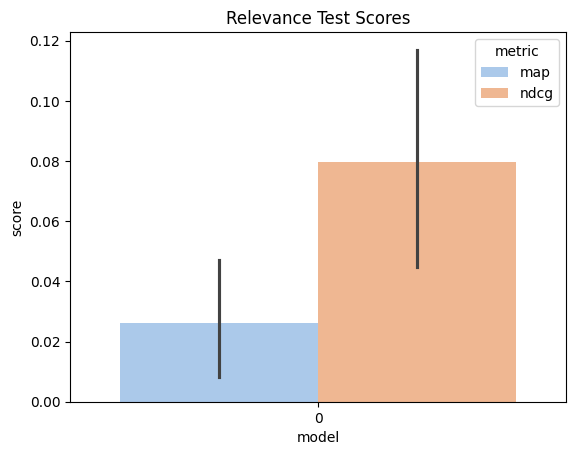

In [9]:
plot = sns.barplot(x='model', y='score', hue='metric', data=overall_scores, palette='pastel')
plot.set_title('Relevance Test Scores')
plt.show()

/tmp/ipykernel_17155/451186556.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(models_list)


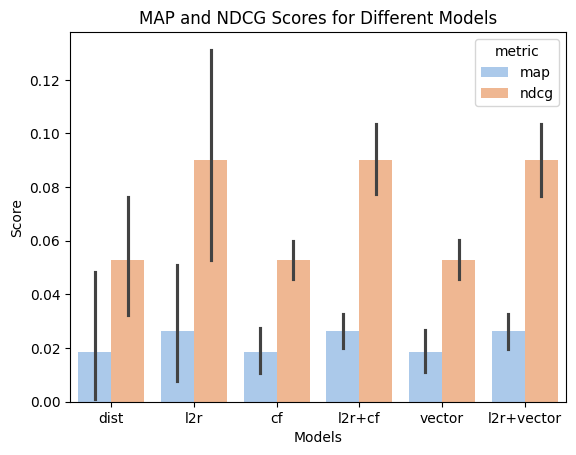

In [ ]:
plot = sns.barplot(x='model', y='score', hue='metric',
                   data=overall_scores, palette='pastel')
models_list = ['dist', 'l2r', 'cf', 'l2r+cf', 'vector', 'l2r+vector']
plot.set_xticklabels(models_list)
plot.set_xlabel('Models')
plot.set_ylabel('Score')
plot.set_title('MAP and NDCG Scores for Different Models')
plt.show()

In [ ]:
search_engine.pipeline.query(query, user_id=2)

/home/zim/UMSI/PlugStation-Recommendation-System/src/vector_ranker.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_docs['score'] = relevant_docs.apply(
/home/zim/UMSI/PlugStation-Recommendation-System/src/ranker.py:194: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  score = 1 / (1 + distance.distance((query_parts[0], query_parts[1]), (doc.Latitude, doc.Longitude)).km)
/home/zim/UMSI/PlugStation-Recommendation-System/src/ranker.py:196: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will 

[502.0,
 52367.0,
 52366.0,
 53252.0,
 14682.0,
 25883.0,
 25882.0,
 14683.0,
 16148.0,
 15258.0]